# Predicting Sale Prices for Ames, IA Housing Dataset

#### By: _Leticia G._

# Problem Statement
Already placed as the 64th best city to live in the US according to a study by Livability, Ames, Iowa is a popular living destination for Americans. Close to Iowa State University, it is a popular place for graduates and families to settle down. This project aims to explore trends in Ames, Iowa housing data and seeks to indetify housing features that increase the Sale Price of a house. This would allow real estate investors to better invest in the houses being built and get the most bang for their buck.

# Background Research: What factors would effect house price?

Some of the most important factors when it comes to buying a house is the size of the house, location (nice area vs bad area, school area, close to work etc - neighborhood variable), number of beds and bath, year built, garage (88% of Americans have access to a car - Pew Research Center 2015), and yard size.

Special features like paved driveway (alley variable), pool, backyard, ac unit/heating, basement, fireplace, and condition and quality of the house, garage, kitchen, fireplace, garage are also attractive features to some home buyers.

However, let's see which of these features actually increase the Sales Price of homes in Ames, Iowa.

# Outside data
- https://www.ortalheat.com/blog/which-features-do-americans-want-in-their-dream-home-hint-a-fireplace-is-on-the-list
- https://eyeonhousing.org/2019/09/share-of-new-homes-with-fireplaces-drops-to-record-low/
- https://datausa.io/profile/geo/ames-ia/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
import os
os.chdir('C:\\Users\\Leticia\\flex\\Submissions\\Projects\\project-2-master\\')

df_train = pd.read_csv("./datasets/train.csv")
df_test  = pd.read_csv("./datasets/test.csv")

## Quick check of the data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
print(df_test.shape)
print(df_train.shape)

(878, 80)
(2051, 81)


In [6]:
# It's the dependent - 'SalePrice'
set(df_train) - set(df_test)

{'SalePrice'}

In [7]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [9]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
df_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


# Data Cleaning

In [11]:
# Set the ID column to index for both train and test

df_train.set_index('Id', inplace=True)

In [12]:
df_test.set_index('Id', inplace=True)

In [13]:
print(df_train.shape)
print(df_test.shape)

(2051, 80)
(878, 79)


In [14]:
df_train.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Finish      114
Garage Cond        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Year Built           0
dtype: int64

It looks like more than 50% of the homes in the dataset do not contain a pool, alley, fence, or specify the quality of the fireplace. These might skew our model so let's fix all the nulls and choose other criteria.

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

MS SubClass isn't really a numerical integer; it's representative of the house stories so it should be changed to string instead.
PID, Year Built, Year Remod/Add, and Yr Sold as well.

In [16]:
df_train['MS SubClass'] = df_train['MS SubClass'].astype(str)

In [17]:
df_test['MS SubClass'] = df_test['MS SubClass'].astype(str)

In [18]:
df_train['PID'] = df_train['PID'].astype(str)

In [19]:
df_test['PID'] = df_test['PID'].astype(str)

In [20]:
df_train['Year Built'] = df_train['Year Built'].astype(str)

In [21]:
df_test['Year Built'] = df_test['Year Built'].astype(str)

In [22]:
df_train['Year Remod/Add'] = df_train['Year Remod/Add'].astype(str)

In [23]:
df_test['Year Remod/Add'] = df_test['Year Remod/Add'].astype(str)

In [24]:
df_train['Yr Sold'] = df_train['Yr Sold'].astype(str)

In [25]:
df_test['Yr Sold'] = df_test['Yr Sold'].astype(str)

#### String - None
Pool QC, Misc Feature, Alley, Fence, Fireplace Qu, Garage Qual, Garage Finish, Garage Cond, Garage Type, Bsmt Exposure,BsmtFin Type 2,Bsmt Cond, Bsmt Qual,BsmtFin Type 1,Mas Vnr Type
#### Integers - 0
Lot Frontage, , Mas Vnr Area , Garage Area, Total Bsmt SF,Bsmt Unf SF, BsmtFin SF 1, BsmtFin SF 2, Garage Yr Blt, Bsmt Half Bath, Bsmt Full Bath, Garage Cars

In [26]:
# Filling String Values for Train
# Code from https://stackoverflow.com/questions/36556256/how-do-i-fill-na-values-in-multiple-columns-in-pandas

df_train.update(df_train[['Pool QC','Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Qual', 'Garage Finish', 'Garage Cond', 'Garage Type', 'Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1', 'Mas Vnr Type']].fillna("None"))

In [27]:
# Filling Integer Values for Train
df_train.update(df_train[['Lot Frontage', 'Mas Vnr Area', 'Garage Area','Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Garage Yr Blt', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Garage Cars']].fillna(0))

In [28]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

SalePrice         0
Sale Type         0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Year Remod/Add    0
dtype: int64

In [29]:
df_test.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Qual          25
Bsmt Cond          25
BsmtFin Type 2     25
Mas Vnr Area        1
Electrical          1
Mas Vnr Type        1
Year Built          0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
dtype: int64

In [30]:
df_test['Electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [31]:
# Filling String Values for Test
df_test.update(df_test[['Pool QC','Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Qual', 'Garage Finish', 'Garage Cond', 'Garage Type', 'Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1', 'Mas Vnr Type', 'Electrical']].fillna("None"))

In [32]:
# Filling Integer Values for Test
df_test.update(df_test[['Lot Frontage', 'Mas Vnr Area', 'Garage Area','Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Garage Yr Blt', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Garage Cars']].fillna(0))

In [33]:
df_test.isnull().sum().sort_values(ascending=False).head()

Sale Type       0
Exter Cond      0
Roof Style      0
Roof Matl       0
Exterior 1st    0
dtype: int64

In [34]:
df_train.shape

(2051, 80)

In [35]:
df_test.shape

(878, 79)

In [36]:
#Unsure if this would interfere with kaggle submissions so left as is.

#df_train.columns=df_train.columns.str.replace(' ', '_')
#df_test.columns=df_test.columns.str.replace(' ', '_')

# EDA (Explarotory Data Analysis) 


In [37]:
df_train.describe(include='all').T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PID,2051,2051,535154130,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MS SubClass,2051,16,20,770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MS Zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,2051,NaN,NaN,NaN,57.9444,33.1373,0,43.5,63,78,313
Lot Area,2051,NaN,NaN,NaN,10065.2,6742.49,1300,7500,9430,11513.5,159000
Street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,2051,3,None,1911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,2051,4,Reg,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,2051,4,Lvl,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2051,3,AllPub,2049,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

The average house price is 178,480 dollars, the maximum is 584,500, and the minimum is 12,789.

# Frequency Dist


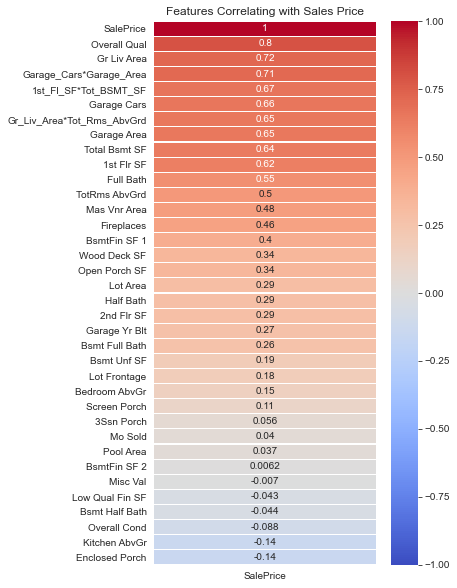

In [138]:
plt.figure(figsize = (5,10))

corr = df_train.corr()
plt.title('Features Correlating with Sales Price')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            cmap = "coolwarm", annot = True,
            vmin = -1, vmax = 1, linewidth = 0.1);

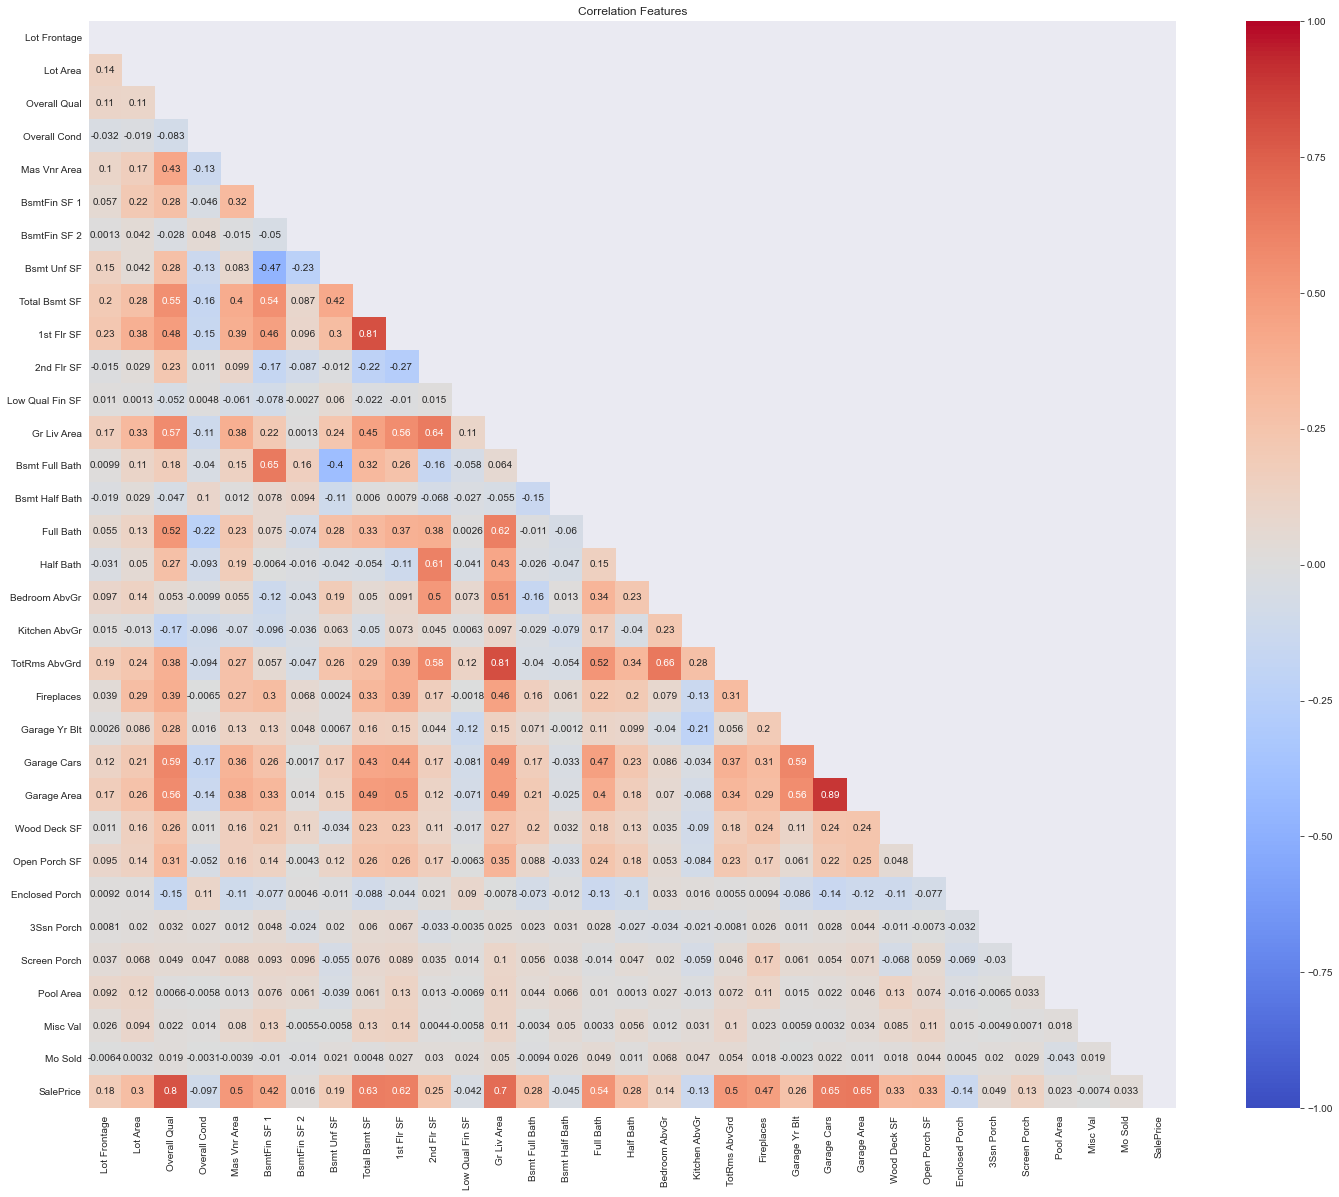

In [40]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25,20))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, square = True, mask = mask,
            vmin = -1, vmax = 1, )
plt.title('Correlation Features');

In [41]:
# Overal qual (.8), gr liv area (.72), tot bsmt sf (.67) is highly correlated so sales price 
# Garage Cars and Garage Area are highly multicorrelated. (.9)
# Gr Liv Area and Total Rms AbvGrd are highly multicorrelated (.81)
# 1st Fl SF and total basmt sf share a high (.81) correlation.

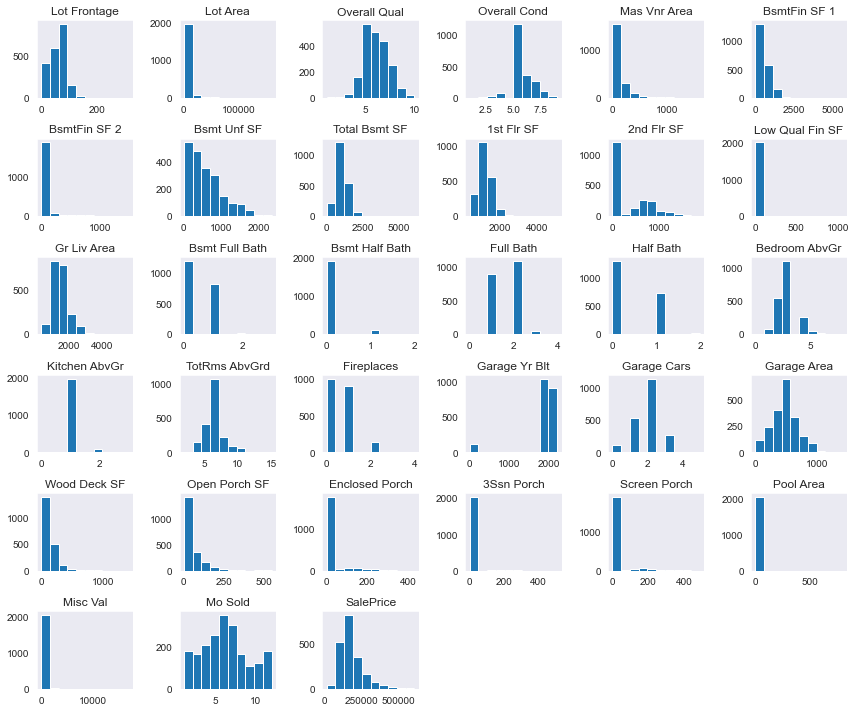

In [42]:
# Histogram of Numeric Columns
df_train.hist(figsize=(12,10), grid=False );
plt.tight_layout() 

<Figure size 2160x1440 with 0 Axes>

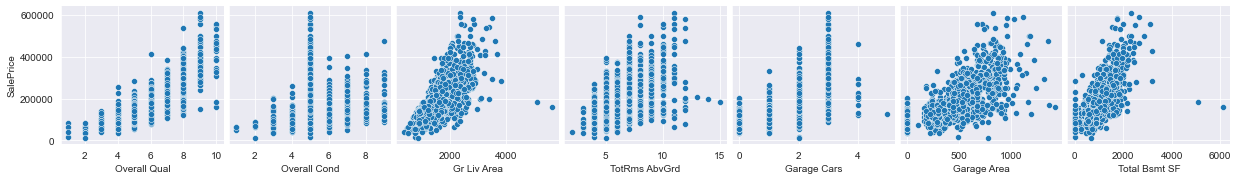

In [43]:
plt.figure(figsize = (30,20))
sns.pairplot(df_train, x_vars = ["Overall Qual", "Overall Cond", "Gr Liv Area", "TotRms AbvGrd", "Garage Cars", "Garage Area", "Total Bsmt SF"], y_vars = ["SalePrice"], diag_kind = None);

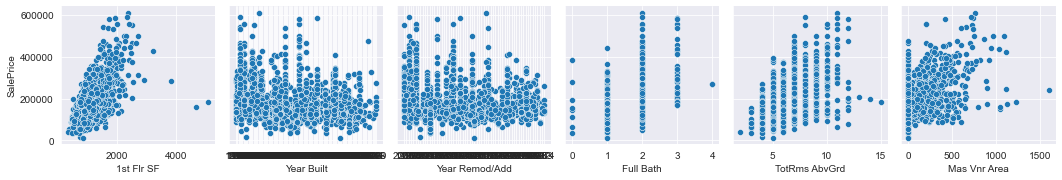

In [44]:
sns.pairplot(df_train, x_vars = ["1st Flr SF", "Year Built", "Year Remod/Add", "Full Bath", "TotRms AbvGrd", "Mas Vnr Area"], y_vars = ["SalePrice"], diag_kind = None);

In [45]:
# As Overall Quality of the house increases, so does the Sale Price. It seems to have a direct linear relationship.
# Overall Cond seems to follow a slight normal distribution with the highest number of obervations lying in the middle 
# *Gr Liv Area: 2-3 outliers after 4000 - linear relationship as well
# *TotRms AbcGrd has 2 outliers (15, 14 rms)
# *Garage Cars had the most expensive sale price around garage holding 3 cars. The 5 car observation could be an outlier.
# *Garage Area has two potential outliers near the lower price of house - check values individually .loc
# *Total Basmt SF has two outliers - use .loc - log maybe?
# *1st Flr Sf Has a liniear relationship as well, and contain 3 outliers
# *Year Built has no linear relationshipo to sales price, but the most expensive homes were built after 2000's. check out house price to 1900 greater than 400K - outlier
# The full bath plot does not tell us much about price 
# *nor TotRms Abv Grd (which has outliers)
# Mas Vnr Area has many 0's, an outlier, and does not have a linear relationship to Sales Price.

In [46]:
df_train['Garage_Cars*Garage_Area']=(df_train['Garage Cars'])*(df_train['Garage Area'])
df_test['Garage_Cars*Garage_Area']=(df_test['Garage Cars'])*(df_test['Garage Area'])

df_train['Gr_Liv_Area*Tot_Rms_AbvGrd']=(df_train['Gr Liv Area'])*(df_train['TotRms AbvGrd'])
df_test['Gr_Liv_Area*Tot_Rms_AbvGrd']=(df_test['Gr Liv Area'])*(df_test['TotRms AbvGrd'])

df_train['1st_Fl_SF*Tot_BSMT_SF']=(df_train['1st Flr SF'])*(df_train['Total Bsmt SF'])
df_test['1st_Fl_SF*Tot_BSMT_SF']=(df_test['1st Flr SF'])*(df_test['Total Bsmt SF'])

## Check the shapes are the same (except for the SalePrice column in train)
print(df_train.shape)
print(df_test.shape)

(2051, 83)
(878, 82)


Text(0.5, 1.0, 'Sales Price to Garage_Cars*Garage_Area')

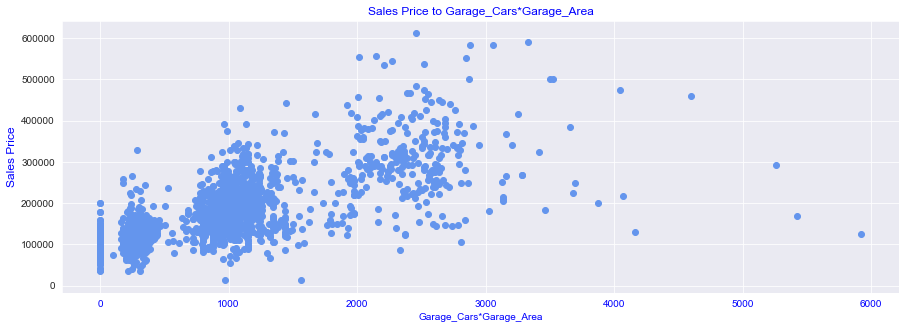

In [47]:
plt.figure(figsize=(15,5))
plt.scatter(x=df_train['Garage_Cars*Garage_Area'],
        y=df_train['SalePrice'], color='cornflowerblue')
plt.xticks(rotation=0, c='blue')
plt.ylabel("Sales Price", size=12, c='blue')
plt.xlabel("Garage_Cars*Garage_Area", c="blue");
plt.title("Sales Price to Garage_Cars*Garage_Area", c='blue', horizontalalignment='center')

In [48]:
# Unusused Interaction Term Plot
# plt.figure(figsize=(15,5))
# plt.scatter(x=df_train['Gr_Liv_Area*Tot_Rms_AbvGrd'],
#         y=df_train['SalePrice'], color='blue')
# plt.xticks(rotation=0, c='blueviolet')
# plt.ylabel("Sales Price", size=12, c='blueviolet')
# plt.xlabel("'Gr_Liv_Area*Tot_Rms_AbvGrd'", c="blueviolet");
# plt.title("Sales Price to 'Gr_Liv_Area*Tot_Rms_AbvGrd'", c='blueviolet', horizontalalignment='center')

Text(0.5, 1.0, "Sales Price to '1st_Fl_SF*Tot_BSMT_SF'")

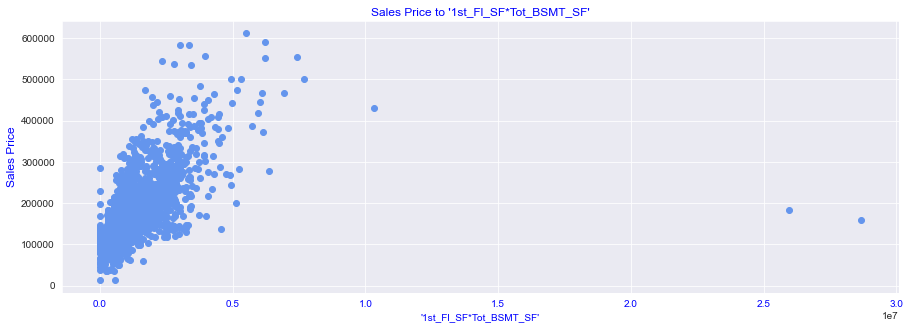

In [49]:
plt.figure(figsize=(15,5))
plt.scatter(x=df_train['1st_Fl_SF*Tot_BSMT_SF'],
        y=df_train['SalePrice'], color='cornflowerblue')
plt.xticks(rotation=0, c='blue')
plt.ylabel("Sales Price", size=12, c='blue')
plt.xlabel("'1st_Fl_SF*Tot_BSMT_SF'", c="blue");
plt.title("Sales Price to '1st_Fl_SF*Tot_BSMT_SF'", c='blue', horizontalalignment='center')

In [50]:
df_train['1st_Fl_SF*Tot_BSMT_SF']

Id
109      525625.0
544      833569.0
153     1117249.0
318      285696.0
255      561756.0
          ...    
1587    3255552.0
785      741321.0
916     1050112.0
639     1440000.0
10      1021832.0
Name: 1st_Fl_SF*Tot_BSMT_SF, Length: 2051, dtype: float64

# Remove Outliers

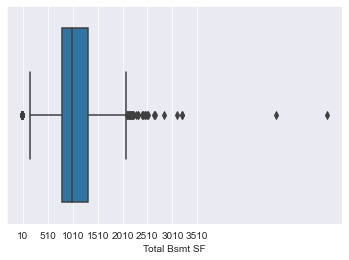

In [51]:
sns.boxplot(x=df_train['Total Bsmt SF']);
plt.xticks(range(10,4000,500));

In [52]:
#df_train.loc[(df_train['Total Bsmt SF'] > 4000)].T.head()
df_train.loc[(df_train['Total Bsmt SF'] > 4000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,None,None,0,1,2008,New,160000,2836.0,67704,28668120.0
2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,None,Elev,17000,10,2007,New,183850,3462.0,76425,25959025.0


In [53]:
df_train.loc[(df_train['Gr Liv Area'] > 4000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,None,None,0,1,2008,New,160000,2836.0,67704,28668120.0
2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,None,Elev,17000,10,2007,New,183850,3462.0,76425,25959025.0


In [54]:
df_train.loc[(df_train['TotRms AbvGrd'] > 12)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
2195,909176080,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,None,None,0,3,2007,WD,200000,0.0,47530,2073600.0
926,909279010,90,RL,0.0,8145,Pave,None,IR1,HLS,AllPub,...,None,None,0,7,2009,WD,205000,800.0,32240,1140800.0
2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,None,Elev,17000,10,2007,New,183850,3462.0,76425,25959025.0


In [55]:
df_train.loc[(df_train['Garage Cars'] == 5)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
747,903236040,30,RM,50.0,8635,Pave,None,Reg,Lvl,AllPub,...,None,None,0,8,2009,WD,126500,5920.0,5360,1149184.0


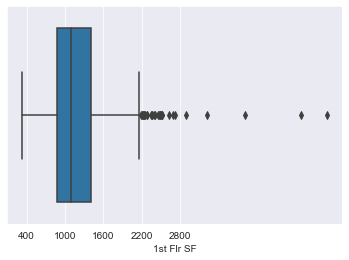

In [56]:
sns.boxplot(x=df_train['1st Flr SF']);
plt.xticks(range(400,3000,600));

In [57]:
df_train.loc[(df_train['1st Flr SF'] > 3000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
1773,528366050,20,RL,0.0,12692,Pave,None,IR1,Lvl,AllPub,...,None,None,0,5,2007,WD,430000,1092.0,32280,10329600.0
1498,908154080,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,...,None,None,0,7,2008,WD,284700,1248.0,42020,0.0
1499,908154235,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,None,None,0,1,2008,New,160000,2836.0,67704,28668120.0
2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,None,Elev,17000,10,2007,New,183850,3462.0,76425,25959025.0


In [58]:
df_train.loc[(df_train['Full Bath'] ==4)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
816,906230010,90,RL,0.0,11855,Pave,None,Reg,Lvl,AllPub,...,None,None,0,10,2009,WD,269500,3280.0,22296,1364224.0
817,906230020,90,RL,0.0,7939,Pave,None,Reg,Lvl,AllPub,...,None,None,0,10,2009,WD,269500,3280.0,22296,1364224.0


In [59]:
df_train.loc[(df_train['Mas Vnr Area'] > 1500)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
1850,533241030,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,None,None,0,6,2007,WD,239000,1152.0,13650,950625.0


In [60]:
# Reoccuring outliers in mulitple categories include IDs 2181 and 1499

In [61]:
# Dropping Outliers
df_train.drop(index=2181, axis=0, inplace=True)
df_train.drop(index=1499, axis=0, inplace=True)
df_train.drop(index=2195, axis=0, inplace=True)
df_train.drop(index=926, axis=0, inplace=True)
df_train.drop(index=747, axis=0, inplace=True)
df_train.drop(index=1773, axis=0, inplace=True)
df_train.drop(index=1498, axis=0, inplace=True)
df_train.drop(index=816, axis=0, inplace=True)
df_train.drop(index=817, axis=0, inplace=True)
df_train.drop(index=1850, axis=0, inplace=True)



In [62]:
df_train['Garage_Cars*Garage_Area'].describe()

count    2041.000000
mean      981.958844
std       726.086488
min         0.000000
25%       319.000000
50%       956.000000
75%      1152.000000
max      5424.000000
Name: Garage_Cars*Garage_Area, dtype: float64

In [63]:
outliersGCGA=df_train['Garage_Cars*Garage_Area'].mean()+3*(df_train['Garage_Cars*Garage_Area'].std())

In [64]:
df_train.loc[(df_train['Garage_Cars*Garage_Area'] > outliersGCGA)].sort_index()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
247,906204230,60,RL,87.0,12361,Pave,None,IR1,Lvl,AllPub,...,None,None,0,5,2010,WD,218000,4068.0,14416,911944.0
367,527214050,20,RL,63.0,17423,Pave,None,IR1,Lvl,AllPub,...,None,None,0,7,2009,New,501837,3498.0,20106,4950544.0
498,528344040,60,RL,0.0,16545,Pave,None,IR1,Lvl,AllPub,...,None,None,0,5,2009,WD,340000,3207.0,17150,1682040.0
670,535402330,90,RL,91.0,11643,Pave,None,Reg,Lvl,AllPub,...,None,None,0,8,2009,WD,200000,3872.0,31608,1669824.0
819,906340100,20,RL,84.0,10933,Pave,None,Reg,Lvl,AllPub,...,None,None,0,7,2009,New,323262,3414.0,13440,2612400.0
863,907250070,20,RL,90.0,11664,Pave,None,Reg,Lvl,AllPub,...,None,None,0,9,2009,WD,250000,3693.0,9666,2527659.0
1028,527357180,60,RL,0.0,12511,Pave,None,IR1,Lvl,AllPub,...,MnPrv,None,0,12,2008,WD,292500,5256.0,22720,2016400.0
1053,528104050,20,RL,114.0,14803,Pave,None,Reg,Lvl,AllPub,...,None,None,0,6,2008,New,385000,3660.0,14588,4330552.0
1060,528118090,60,RL,96.0,12539,Pave,None,Reg,Lvl,AllPub,...,None,None,0,6,2008,WD,460000,4600.0,27900,2643840.0


In [65]:
#Dropping Outliers from Interaction Terms
df_train.drop(index=247, axis=0, inplace=True)
df_train.drop(index=498, axis=0, inplace=True)
df_train.drop(index=367, axis=0, inplace=True)
df_train.drop(index=670, axis=0, inplace=True)
df_train.drop(index=819, axis=0, inplace=True)
df_train.drop(index=863, axis=0, inplace=True)
df_train.drop(index=1028, axis=0, inplace=True)
df_train.drop(index=1053, axis=0, inplace=True)
df_train.drop(index=1060, axis=0, inplace=True)
df_train.drop(index=1426, axis=0, inplace=True)
df_train.drop(index=1638, axis=0, inplace=True)
df_train.drop(index=1702, axis=0, inplace=True)
df_train.drop(index=2279, axis=0, inplace=True)
df_train.drop(index=2283, axis=0, inplace=True)
df_train.drop(index=2385, axis=0, inplace=True)
df_train.drop(index=2750, axis=0, inplace=True)

In [66]:
# Outliers for unused interaction term

# df_train['Gr_Liv_Area*Tot_Rms_AbvGrd'].describe()
# outliersGLATR=df_train['Gr_Liv_Area*Tot_Rms_AbvGrd'].mean()+3*(df_train['Gr_Liv_Area*Tot_Rms_AbvGrd'].std())
#df_train.loc[(df_train['Gr_Liv_Area*Tot_Rms_AbvGrd'] > outliersGLATR)].sort_index()

In [67]:
#Dropping Outliers from Interaction Terms
# df_train.drop(index=16, axis=0, inplace=True)
# df_train.drop(index=254, axis=0, inplace=True)
# df_train.drop(index=423, axis=0, inplace=True)
# df_train.drop(index=434, axis=0, inplace=True)
# df_train.drop(index=910, axis=0, inplace=True)
# df_train.drop(index=1307, axis=0, inplace=True)
# df_train.drop(index=2046, axis=0, inplace=True)
# df_train.drop(index=2331, axis=0, inplace=True)
# df_train.drop(index=2351, axis=0, inplace=True)
# df_train.drop(index=2451, axis=0, inplace=True)
# df_train.drop(index=2667, axis=0, inplace=True)

In [68]:
df_train['1st_Fl_SF*Tot_BSMT_SF'].describe()

count    2.025000e+03
mean     1.333681e+06
std      9.600968e+05
min      0.000000e+00
25%      6.924960e+05
50%      1.054729e+06
75%      1.788480e+06
max      7.672816e+06
Name: 1st_Fl_SF*Tot_BSMT_SF, dtype: float64

In [69]:
outliers1stfltotbsmt=df_train['1st_Fl_SF*Tot_BSMT_SF'].mean()+4*(df_train['1st_Fl_SF*Tot_BSMT_SF'].std())

In [70]:
df_train.loc[(df_train['1st_Fl_SF*Tot_BSMT_SF'] > outliers1stfltotbsmt)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Cars*Garage_Area,Gr_Liv_Area*Tot_Rms_AbvGrd,1st_Fl_SF*Tot_BSMT_SF
Id,,,,,,,,,,,,,,,,,,,,,
380,527355150,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,MnPrv,None,0,7,2009,WD,278000,1084.0,22716,6370576.0
448,528166060,20,RL,103.0,13472,Pave,None,Reg,Lvl,AllPub,...,None,None,0,6,2009,WD,386250,2904.0,19136,5721664.0
457,528176030,20,RL,100.0,14836,Pave,None,IR1,HLS,AllPub,...,None,None,0,2,2009,WD,552000,2847.0,19936,6210064.0
514,528441090,20,RL,85.0,11128,Pave,None,Reg,Lvl,AllPub,...,GdPrv,None,0,10,2009,WD,468000,2385.0,22410,6120420.0
1861,533350020,20,RL,94.0,17778,Pave,None,IR1,Lvl,AllPub,...,None,None,0,3,2007,WD,373000,1352.0,17479,6145117.0
1057,528110110,20,RL,105.0,13693,Pave,None,Reg,Lvl,AllPub,...,None,None,0,8,2008,WD,417500,1950.0,22176,5957952.0
1764,528327060,20,RL,0.0,11400,Pave,None,Reg,Lvl,AllPub,...,None,None,0,3,2007,WD,466500,2412.0,21064,6932689.0
445,528142130,20,RL,85.0,10655,Pave,None,IR1,Lvl,AllPub,...,None,None,0,10,2009,WD,284000,2640.0,11403,5222574.0
424,528106020,20,RL,105.0,15431,Pave,None,Reg,Lvl,AllPub,...,None,None,0,4,2009,WD,555000,2016.0,24020,7431788.0


In [71]:
df_train.drop(index=380, axis=0, inplace=True)
df_train.drop(index=448, axis=0, inplace=True)
df_train.drop(index=457, axis=0, inplace=True)
df_train.drop(index=514, axis=0, inplace=True)
df_train.drop(index=1861, axis=0, inplace=True)
df_train.drop(index=1057, axis=0, inplace=True)
df_train.drop(index=1764, axis=0, inplace=True)
df_train.drop(index=445, axis=0, inplace=True)
df_train.drop(index=424, axis=0, inplace=True)
df_train.drop(index=47, axis=0, inplace=True)
df_train.drop(index=45, axis=0, inplace=True)

# Dummy Code

In [72]:
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")
ohe.fit(df_train[['Neighborhood']])

## Transform both training and testing data using the fit OneHotEncoder
train_dummies = pd.DataFrame(ohe.transform(df_train[['Neighborhood']]),
                             columns = ohe.get_feature_names(), index = df_train.index)

test_dummies  = pd.DataFrame(ohe.transform(df_test[["Neighborhood"]]),
                             columns = ohe.get_feature_names(), index = df_test.index)

## Check the shape of both dummy dataframes - still needs to be dropped which we can do manually 
print(train_dummies.shape)
print(test_dummies.shape)

(2014, 28)
(878, 28)


In [73]:
train_dummies.columns

Index(['x0_Blmngtn', 'x0_Blueste', 'x0_BrDale', 'x0_BrkSide', 'x0_ClearCr',
       'x0_CollgCr', 'x0_Crawfor', 'x0_Edwards', 'x0_Gilbert', 'x0_Greens',
       'x0_GrnHill', 'x0_IDOTRR', 'x0_Landmrk', 'x0_MeadowV', 'x0_Mitchel',
       'x0_NAmes', 'x0_NPkVill', 'x0_NWAmes', 'x0_NoRidge', 'x0_NridgHt',
       'x0_OldTown', 'x0_SWISU', 'x0_Sawyer', 'x0_SawyerW', 'x0_Somerst',
       'x0_StoneBr', 'x0_Timber', 'x0_Veenker'],
      dtype='object')

In [74]:
train_dummies.drop(columns="x0_Blmngtn", inplace=True)
test_dummies.drop(columns="x0_Blmngtn", inplace=True)

In [75]:
## Join the train and test dummy columns back with the original dataframes
df_train_full = df_train.join(train_dummies)
df_test_full = df_test.join(test_dummies)

## Check the shapes are the same (except for the SalePrice column in train)
print(df_test_full.shape)
print(df_train_full.shape)

(878, 109)
(2014, 110)


In [76]:
set(train_dummies)-set(test_dummies)

set()

In [77]:
## Check that all the columns are in the same order
(df_train_full.drop(columns='SalePrice').columns == df_test_full.columns).all()

True

# Define Your Variables and Model

In [78]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
features.extend(train_dummies.columns)

In [79]:
# Define your X and Y
X = df_train_full[features]
y = df_train_full['SalePrice']

In [80]:
## Train Test Split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=42)

In [81]:
X_train.shape, X_test.shape

((1510, 31), (504, 31))

## Baseline Model

In [82]:
y_test_baseline=[y_train.mean()]*len(y_test)

In [83]:
#RMSE
baseline_rmse=mean_squared_error(y_test, y_test_baseline)**.5
print(f'Baseline RMSE: {baseline_rmse}')

#Our prediction is off by $75724 - we get it by unit (dollar) because of rmse

Baseline RMSE: 77935.44328289035


## Scale Data + Baisc Linear Regression

In [84]:
# Instantiate, fit, and transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
print(f'X train scaled is: {X_train_scaled.shape}')
print(f'y train shape is: {y_train.shape}')
print(f'X test scaled shape is: {X_test_scaled.shape}')
print(f'y test shape is: {y_test.shape}')

X train scaled is: (1510, 31)
y train shape is: (1510,)
X test scaled shape is: (504, 31)
y test shape is: (504,)


In [86]:
## Instantiate and fit a linear regression model to your now scaled training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [87]:
# Predictions
y_train_pred_sc = lr.predict(X_train_scaled)
y_test_pred_sc = lr.predict(X_test_scaled)

### Model 1 - No interaction terms

In [88]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

print('Model 1')
print('~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'Scaled Train RMSE: {mean_squared_error(y_train, y_train_pred_sc)**.5}')
print(f'Scaled Test RMSE: {mean_squared_error(y_test, y_test_pred_sc)**.5}')
print(f'Baseline RMSE: {baseline_rmse}')

print('~~~~~~~~~~~~~~~~~~~~~~~~')
train_r2=r2_score(y_train, y_train_pred_sc)
test_r2=r2_score(y_test, y_test_pred_sc)

print(f'Scaled Train R2: {train_r2}')
print(f'Scaled Test R2: {test_r2}')

# Alternate Way
# print(f'Scaled Train R2: {lr.score(X_train_scaled, y_train)}')
# print(f'Scaled Test R2: {lr.score(X_test_scaled, y_test)}')


print('~~~~~~~~~~~~~~~~~~~~~~~~')
train_r2_adj = 1 - (1 - train_r2)*(len( y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)
test_r2_adj = 1 - (1 - test_r2)*(len( y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"Train R-squared Adj. = {train_r2_adj}")
print(f"Test R-squared Adj. = {test_r2_adj}")

Model 1
~~~~~~~~~~~~~~~~~~~~~~~~
Scaled Train RMSE: 27981.032152304986
Scaled Test RMSE: 33040.653359449214
Baseline RMSE: 77935.44328289035
~~~~~~~~~~~~~~~~~~~~~~~~
Scaled Train R2: 0.8544331388067705
Scaled Test R2: 0.8202641020751242
~~~~~~~~~~~~~~~~~~~~~~~~
Train R-squared Adj. = 0.8513799773067772
Test R-squared Adj. = 0.8084594138639566


In [89]:
# Compared to ur baseline our model makes vast improvements on predicting price. $49,954 for the train and $44,895 for test.
# Our test data is about $5,000 off from our model which is great.
# Our model sates that our features explain 80% (adj test r2 for number of predictors in the model) of the variability in our Sales Price holding all else constant.

In [90]:
## Let's check the coefficients in an interpretable way
coef_df=pd.DataFrame({
    "coef": lr.coef_
}, index=X.columns)

coef_df.head(10)

,coef
Overall Qual,23413.568886
Gr Liv Area,24142.148908
Garage Area,9048.205202
Total Bsmt SF,12385.191923
x0_Blueste,-1456.798682
x0_BrDale,-2693.066659
x0_BrkSide,-2422.284782
x0_ClearCr,1949.563937
x0_CollgCr,793.770854
x0_Crawfor,2094.418961


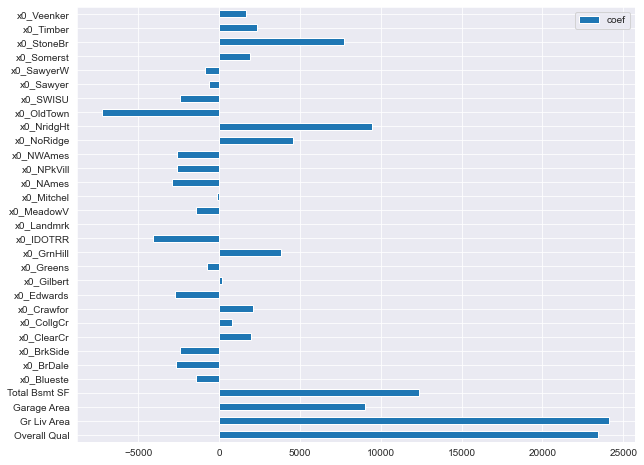

In [91]:
## Make a bar chart to visualize coefficients
coef_df.plot(kind='barh', figsize= (10,8));

In [92]:
# Because we scaled the data we do not need to normalize the coefficients. We now have a better comparison on how the coefficients effect SalePrice.
# Overall Qual, Gr Liv Area, Total BSMT SF, NoRidge, NridgHt, GrnHill and StoneBr are the features with the highest postivie impact on price.
# OldTown an IDOTRR seem to be the neighborhoods with the highest adverse effects on Sales Price. (Names, Edwards tied)

# Model Improvement attempts - Feature Engineering, Variable Selection, Ridge, Lasso

## Model 2

Before I only chose one of the variables that were highly correlated with another, now I will add the best interaction terms to my model. I'll do this for all the highly correlated features and see which have the best effect on RMSE.
- Garage Cars and Garage Area are highly multicorrelated. (.9)
- Gr Liv Area and Total Rms AbvGrd are highly multicorrelated (.81) - Ended up not using in final model
- 1st Fl SF and total bsmt sf share a high (.81) correlation.

In [93]:
# Overall Qual - categorical - ordinal
# Neighborhood - categorical - nominal 
# GrLiv Area
# Garage Area
# Total Bsmt SF

# not used
# 1ST FLR SF

# Overal qual (.8), gr liv area (.72), tot bsmt sf (.67) is highly correlated to sales price 
# Garage Cars and Garage Area are highly multicorrelated. (.9)
# Gr Liv Area and Total Rms AbvGrd are highly multicorrelated (.81)
# 1st Fl SF and total bsmt sf share a high (.81) correlation.

In [94]:
features = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF','Garage_Cars*Garage_Area']
features.extend(train_dummies.columns)

In [95]:
# Define your X and Y
X = df_train_full[features]
y = df_train_full['SalePrice']

In [96]:
## Train Test Split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=42)

In [97]:
X_train.shape, X_test.shape

((1510, 31), (504, 31))

In [98]:
# Instantiate, fit, and transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
print(f'X train scaled is: {X_train_scaled.shape}')
print(f'y train shape is: {y_train.shape}')
print(f'X test scaled shape is: {X_test_scaled.shape}')
print(f'y test shape is: {y_test.shape}')

X train scaled is: (1510, 31)
y train shape is: (1510,)
X test scaled shape is: (504, 31)
y test shape is: (504,)


In [100]:
## Instantiate and fit a linear regression model to your now scaled training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [101]:
# Predictions
y_train_pred_sc = lr.predict(X_train_scaled)
y_test_pred_sc = lr.predict(X_test_scaled)

In [102]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

print('Model 2')
print('~~~~~~~~~~~~~~~~~~~~~~~~')

print(f'Scaled Train RMSE: {mean_squared_error(y_train, y_train_pred_sc)**.5}')
print(f'Scaled Test RMSE: {mean_squared_error(y_test, y_test_pred_sc)**.5}')
print(f'Baseline RMSE: {baseline_rmse}')

print('~~~~~~~~~~~~~~~~~~~~~~~~')
train_r2=r2_score(y_train, y_train_pred_sc)
test_r2=r2_score(y_test, y_test_pred_sc)

print(f'Scaled Train R2: {train_r2}')
print(f'Scaled Test R2: {test_r2}')

# Alternate Way
# print(f'Scaled Train R2: {lr.score(X_train_scaled, y_train)}')
# print(f'Scaled Test R2: {lr.score(X_test_scaled, y_test)}')


print('~~~~~~~~~~~~~~~~~~~~~~~~')
train_r2_adj = 1 - (1 - train_r2)*(len( y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)
test_r2_adj = 1 - (1 - test_r2)*(len( y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"Train R-squared Adj. = {train_r2_adj}")
print(f"Test R-squared Adj. = {test_r2_adj}")

Model 2
~~~~~~~~~~~~~~~~~~~~~~~~
Scaled Train RMSE: 27757.604663436436
Scaled Test RMSE: 32299.75234928423
Baseline RMSE: 77935.44328289035
~~~~~~~~~~~~~~~~~~~~~~~~
Scaled Train R2: 0.8567485493369258
Scaled Test R2: 0.8282344923245277
~~~~~~~~~~~~~~~~~~~~~~~~
Train R-squared Adj. = 0.8537439519278898
Test R-squared Adj. = 0.8169532831339776


Adding the combination feature improved the test RMSE by around $1,000, and our test adj r2 increased minimally.

In [103]:
## Let's check the coefficients in an interpretable way
coef_df=pd.DataFrame({
    "coef": lr.coef_
}, index=X.columns)

coef_df.head(10)

,coef
Overall Qual,23061.982509
Gr Liv Area,23523.786242
Total Bsmt SF,11887.198762
Garage_Cars*Garage_Area,10908.249328
x0_Blueste,-1292.854632
x0_BrDale,-2399.457080
x0_BrkSide,-1890.950345
x0_ClearCr,2456.766797
x0_CollgCr,1575.255534
x0_Crawfor,2697.740388


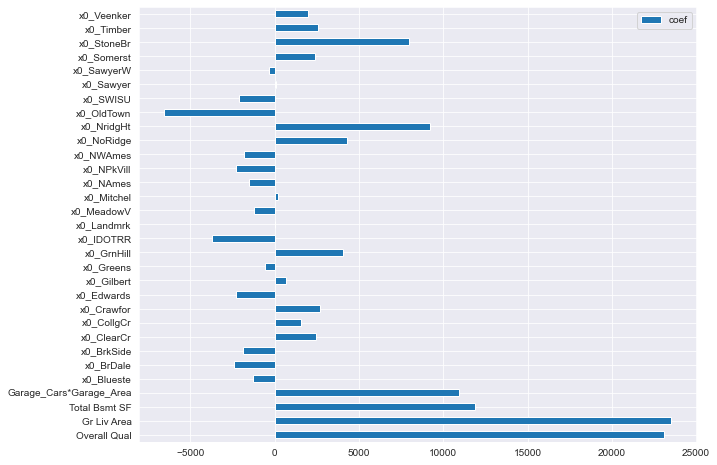

In [104]:
## Make a bar chart to visualize coefficients Model 2
coef_df.plot(kind='barh', figsize= (10,8));

# Model 3

 For this model I experimented with different variables correlated to price and these were the best variables with the lowest rmse scores and highest adj r2's.

In [105]:
features = ['Overall Qual', 'Gr Liv Area', '1st_Fl_SF*Tot_BSMT_SF','Garage_Cars*Garage_Area', 'Fireplaces', 'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath']
features.extend(train_dummies.columns)

In [106]:
# Define your X and Y
X = df_train_full[features]
y = df_train_full['SalePrice']

In [107]:
## Train Test Split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=42)

In [108]:
X_train.shape, X_test.shape

((1510, 36), (504, 36))

In [109]:
# Instantiate, fit, and transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
print(f'X train scaled is: {X_train_scaled.shape}')
print(f'y train shape is: {y_train.shape}')
print(f'X test scaled shape is: {X_test_scaled.shape}')
print(f'y test shape is: {y_test.shape}')

X train scaled is: (1510, 36)
y train shape is: (1510,)
X test scaled shape is: (504, 36)
y test shape is: (504,)


In [111]:
## Instantiate and fit a linear regression model to your now scaled training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [112]:
# Predictions
y_train_pred_sc = lr.predict(X_train_scaled)
y_test_pred_sc = lr.predict(X_test_scaled)

In [113]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

print('Model 3')
print('~~~~~~~~~~~~~~~~~~~~~~~~')

print(f'Scaled Train RMSE: {mean_squared_error(y_train, y_train_pred_sc)**.5}')
print(f'Scaled Test RMSE: {mean_squared_error(y_test, y_test_pred_sc)**.5}')
print(f'Baseline RMSE: {baseline_rmse}')

print('~~~~~~~~~~~~~~~~~~~~~~~~')
train_r2=r2_score(y_train, y_train_pred_sc)
test_r2=r2_score(y_test, y_test_pred_sc)

print(f'Scaled Train R2: {train_r2}')
print(f'Scaled Test R2: {test_r2}')

# Alternate Way
# print(f'Scaled Train R2: {lr.score(X_train_scaled, y_train)}')
# print(f'Scaled Test R2: {lr.score(X_test_scaled, y_test)}')


print('~~~~~~~~~~~~~~~~~~~~~~~~')
train_r2_adj = 1 - (1 - train_r2)*(len( y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)
test_r2_adj = 1 - (1 - test_r2)*(len( y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"Train R-squared Adj. = {train_r2_adj}")
print(f"Test R-squared Adj. = {test_r2_adj}")

Model 3
~~~~~~~~~~~~~~~~~~~~~~~~
Scaled Train RMSE: 25877.367205564547
Scaled Test RMSE: 30124.28429827867
Baseline RMSE: 77935.44328289035
~~~~~~~~~~~~~~~~~~~~~~~~
Scaled Train R2: 0.8754983136991535
Scaled Test R2: 0.8505929648764732
~~~~~~~~~~~~~~~~~~~~~~~~
Train R-squared Adj. = 0.8724555026286644
Test R-squared Adj. = 0.8390755060660942


Adding the combination features and the rest of the variables correlated with Sales Price improved the train RMSE by 1880  and test RMSE by 2175 compared to model 2.

In [114]:
## Let's check the coefficients in an interpretable way
coef_df=pd.DataFrame({
    "coef": lr.coef_
}, index=X.columns)

coef_df.head()

,coef
Overall Qual,22235.234613
Gr Liv Area,20142.732042
1st_Fl_SF*Tot_BSMT_SF,10516.277434
Garage_Cars*Garage_Area,9038.148433
Fireplaces,2918.708699


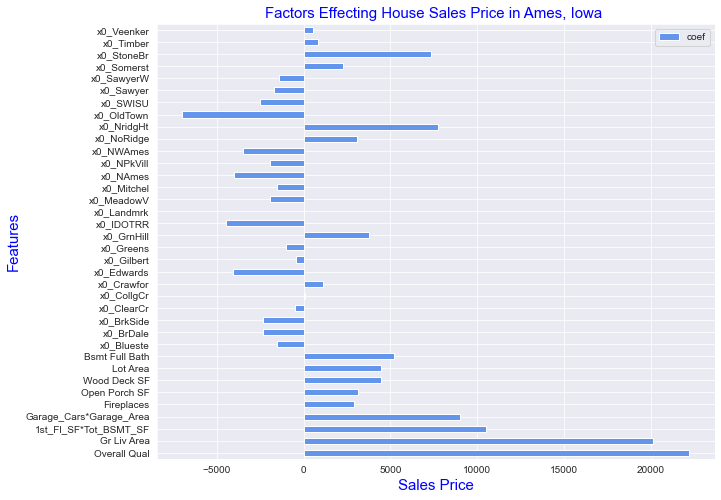

In [137]:
## Make a bar chart to visualize coefficients Model 3
coef_df.plot(kind='barh', figsize= (10,8), color='cornflowerblue')

plt.ylabel("Features", size=15, c='blue')
plt.xlabel("Sales Price",size=15, c="blue");
plt.title("Factors Effecting House Sales Price in Ames, Iowa ", c='blue',size=15, horizontalalignment='center');

# Find the best Alpha for Ridge

In [116]:
from sklearn.linear_model import Ridge

In [117]:
from sklearn.linear_model import RidgeCV

In [118]:
np.logspace(0, 3, 20)

array([   1.        ,    1.43844989,    2.06913808,    2.97635144,
          4.2813324 ,    6.15848211,    8.8586679 ,   12.74274986,
         18.32980711,   26.36650899,   37.92690191,   54.55594781,
         78.47599704,  112.88378917,  162.37767392,  233.57214691,
        335.98182863,  483.29302386,  695.19279618, 1000.        ])

In [119]:
ridge_alphas=np.logspace(0, 3, 100)

In [120]:
# Cross-validate over our list of ridge alphas.
#ridge regression model with built in cross validation on 5 folds.
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="r2", cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([   1.        ,    1.07226722,    1.149757  ,    1.23284674,
          1.32194115,    1.41747416,    1.51991108,    1.62975083,
          1.7475284 ,    1.87381742,    2.009233  ,    2.15443469,
          2.3101297 ,    2.47707636,    2.65608778,    2.84803587,
          3.05385551,    3.27454916,    3.51119173,    3.76493581,
          4.03701726,    4.32876128,    4.64158883,    4.97702356,
          5.33669923,    5.72236766,    6.13590727,    6.57933225,
          7.05480231,    7.56463328,    8.11130831,    8...
        151.9911083 ,  162.97508346,  174.75284   ,  187.38174229,
        200.92330026,  215.443469  ,  231.01297001,  247.7076356 ,
        265.60877829,  284.80358684,  305.38555088,  327.45491629,
        351.11917342,  376.49358068,  403.70172586,  432.87612811,
        464.15888336,  497.70235643,  533.66992312,  572.23676594,
        613.59072734,  657.93322466,  705.48023107,  756.46332755,
        811.13083079,  869.74900262,  932.60334688, 10

In [121]:
# Here is the optimal value of alpha which it only knows after running above
ridge_cv.alpha_

43.287612810830595

# Ridge Model

In [122]:
# Bigger alphas has more regularization
ridge = Ridge(alpha = 43)

In [123]:
# Fit.
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=43)

In [124]:
# Generate predictions on the test set and evaluate using MSE
pred_ridge = ridge.predict(X_test_scaled)
pred_ridge_train = ridge.predict(X_train_scaled)
print(f"Ridge Train RMSE: {mean_squared_error(y_train, pred_ridge_train)**0.5}")
print(f"Ridge Test RMSE: {mean_squared_error(y_test, pred_ridge)**0.5}")
print("~~~~~~~~~~~~~")
# Evaluate model using R2.
print(f"Ridge Training Score: {ridge.score(X_train_scaled, y_train)}")
print(f"Ridge Testing Score: {ridge.score(X_test_scaled, y_test)}")

Ridge Train RMSE: 25892.370009359773
Ridge Test RMSE: 30058.12231381813
~~~~~~~~~~~~~
Ridge Training Score: 0.875353908294892
Ridge Testing Score: 0.8512485297058392


In [125]:
ridge.coef_

array([21571.07655836, 19518.82275898, 10648.58759966,  9342.04999257,
        3271.38322402,  3278.52895938,  4506.53620995,  4306.43311844,
        5097.29256835, -1321.38938363, -1967.0459016 , -1721.07317876,
         -71.97390156,  1063.96991014,  1708.42594329, -3250.05000642,
         455.65326042,  -847.93620268,  3790.35254955, -3826.26466956,
           0.        , -1608.02885394,  -880.83182606, -2868.31491658,
       -1585.30278943, -2712.40546772,  3643.22612692,  8423.36721333,
       -6001.58213588, -2047.55318344, -1095.7796131 ,  -658.10321807,
        3109.2274677 ,  7707.63239037,  1411.39192309,   848.7760228 ])

- Overall Qual (21571), Gr Liv Area (19518), 1st_Fl_SF*Tot_BSMT_S (10648), Garage_Cars*Garage_Area (9342), Fireplaces (3271), Open Porch SF(3278), Wood Deck SF (4506), Lot Area (4306), Bsmt Full Bath (5097) are the features with the highest postivie impact on price.
- NoRidge (3643), NridgHt (8423), GrnHill (3790) and StoneBr(7707) Somerst( 3109) are the top 5 neighborhoods with the highest positive effect on Sales Price 
- OldTown(-6001),IDOTRR(-3826), Names (-2868), Edwards (-3250), seem to be the neighborhoods with the highest adverse effects on Sales Price.

# Lasso 

In [126]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000, tol=0.00015)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_scaled, y_train);

In [127]:
lasso_cv.alpha_

1.0

In [128]:
pred_lasso = lasso_cv.predict(X_test_scaled)
pred_lasso_train = lasso_cv.predict(X_train_scaled)
print(f"Lasso Train RMSE: {mean_squared_error(y_train, pred_lasso_train)**0.5}")
print(f"Lasso Test RMSE: {mean_squared_error(y_test, pred_lasso)**0.5}")
print("~~~~~~~~~~~~~")
# Evaluate model using R2.
print(f"Lasso Training Score: {lasso_cv.score(X_train_scaled, y_train)}")
print(f"Lasso Testing Score: {lasso_cv.score(X_test_scaled, y_test)}")

Lasso Train RMSE: 25877.37343056602
Lasso Test RMSE: 30123.066477504442
~~~~~~~~~~~~~
Lasso Training Score: 0.8754982537994529
Lasso Testing Score: 0.8506050446531452


In [129]:
print('~~~~~~~~~~~~~~~~~~~~~~~~')
print('Lasso')

print(f"Lasso Train RMSE: {mean_squared_error(y_train, pred_lasso_train)**0.5}")
print(f"Lasso Test RMSE: {mean_squared_error(y_test, pred_lasso)**0.5}")
print(f"Lasso Training Score: {lasso_cv.score(X_train_scaled, y_train)}")
print(f"Lasso Testing Score: {lasso_cv.score(X_test_scaled, y_test)}")

print('~~~~~~~~~~~~~~~~~~~~~~~~')
print('Ridge')
print(f"Ridge Train RMSE: {mean_squared_error(y_train, pred_ridge_train)**0.5}")
print(f"Ridge Test RMSE: {mean_squared_error(y_test, pred_ridge)**0.5}")
print(f"Ridge Training Score: {ridge.score(X_train_scaled, y_train)}")
print(f"Ridge Testing Score: {ridge.score(X_test_scaled, y_test)}")

print('~~~~~~~~~~~~~~~~~~~~~~~~')
print('Model 3 - OLS')
print(f'Scaled Train RMSE: {mean_squared_error(y_train, y_train_pred_sc)**.5}')
print(f'Scaled Test RMSE: {mean_squared_error(y_test, y_test_pred_sc)**.5}')
print(f'Scaled Train R2: {train_r2}')
print(f'Scaled Test R2: {test_r2}')

~~~~~~~~~~~~~~~~~~~~~~~~
Lasso
Lasso Train RMSE: 25877.37343056602
Lasso Test RMSE: 30123.066477504442
Lasso Training Score: 0.8754982537994529
Lasso Testing Score: 0.8506050446531452
~~~~~~~~~~~~~~~~~~~~~~~~
Ridge
Ridge Train RMSE: 25892.370009359773
Ridge Test RMSE: 30058.12231381813
Ridge Training Score: 0.875353908294892
Ridge Testing Score: 0.8512485297058392
~~~~~~~~~~~~~~~~~~~~~~~~
Model 3 - OLS
Scaled Train RMSE: 25877.367205564547
Scaled Test RMSE: 30124.28429827867
Scaled Train R2: 0.8754983136991535
Scaled Test R2: 0.8505929648764732


Based on having the lowest RMSE, highest ADJ R2, and the features, I've chosen to use the ridge model to answer the problem at hand.
The ridge model explains 85% of the variability in our Sales Price by the features of the model holding all else constant. The other 15% may be in the variables not chosen.

In [130]:
df_train_full['intercept']=1
features = ['Overall Qual', 'Gr Liv Area', '1st_Fl_SF*Tot_BSMT_SF','Garage_Cars*Garage_Area', 'Fireplaces', 'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'intercept']
features.extend(train_dummies.columns)

In [131]:
# Define your X and Y
X = df_train_full[features]
y = df_train_full['SalePrice']

In [132]:
X.columns

Index(['Overall Qual', 'Gr Liv Area', '1st_Fl_SF*Tot_BSMT_SF',
       'Garage_Cars*Garage_Area', 'Fireplaces', 'Open Porch SF',
       'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'intercept', 'x0_Blueste',
       'x0_BrDale', 'x0_BrkSide', 'x0_ClearCr', 'x0_CollgCr', 'x0_Crawfor',
       'x0_Edwards', 'x0_Gilbert', 'x0_Greens', 'x0_GrnHill', 'x0_IDOTRR',
       'x0_Landmrk', 'x0_MeadowV', 'x0_Mitchel', 'x0_NAmes', 'x0_NPkVill',
       'x0_NWAmes', 'x0_NoRidge', 'x0_NridgHt', 'x0_OldTown', 'x0_SWISU',
       'x0_Sawyer', 'x0_SawyerW', 'x0_Somerst', 'x0_StoneBr', 'x0_Timber',
       'x0_Veenker'],
      dtype='object')

In [133]:
## Train Test Split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=42)

In [134]:
X_train.shape, X_test.shape

((1510, 37), (504, 37))

In [135]:
# Instantiate, fit, and transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     366.9
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:03:31   Log-Likelihood:                -23399.
No. Observations:                2014   AIC:                         4.687e+04
Df Residuals:                    1977   BIC:                         4.708e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Overall Qual              1.58e+04    746.289     21.177      0.000    1.43e+04    1.73e+04
Gr Liv Area                41.3755      1.900     21.776      0.000      37.649      45.102
1st_Fl_SF*Tot_BSMT_SF       0.0118      0.001     12.499      0.000       0.010       0.014
Garage_Cars*Garage_Area    15.6342      1.334     11.716      0.000      13.017      18.251
Fireplaces               5456.7818   1193.083      4.574      0.000    3116.949    7796.614
Open Porch SF              44.6795     10.225      4.369      0.000      24.626      64.733
Wood Deck SF               30.4134      5.222      5.824      0.000      20.172      40.655
Lot Area                    0.7962      0.113      7.064      0.000       0.575       1.017
Bsmt Full Bath           1.215e+04   1282.631      9.469      0.000    9630.341    1.47e+04
intercept               -2.974e+04   7454.100     -3.989      0.000   -4.44e+04   -1.51e+04
x0_Blueste              -2.119e+04   1.26e+04     -1.688      0.092   -4.58e+04    3423.967
x0_BrDale               -1.858e+04   8667.983     -2.144      0.032   -3.56e+04   -1580.812
x0_BrkSide              -6791.8133   6790.587     -1.000      0.317   -2.01e+04    6525.647
x0_ClearCr              -4060.6283   8371.043     -0.485      0.628   -2.05e+04    1.24e+04
x0_CollgCr               4304.5944   6273.841      0.686      0.493   -7999.441    1.66e+04
x0_Crawfor               1.315e+04   6805.527      1.933      0.053    -193.426    2.65e+04
x0_Edwards              -1.083e+04   6499.986     -1.666      0.096   -2.36e+04    1918.855
x0_Gilbert               3382.5831   6487.922      0.521      0.602   -9341.299    1.61e+04
x0_Greens               -2.054e+04   1.68e+04     -1.225      0.221   -5.34e+04    1.23e+04
x0_GrnHill               1.073e+05   2.01e+04      5.330      0.000    6.78e+04    1.47e+05
x0_IDOTRR               -1.706e+04   6984.916     -2.442      0.015   -3.08e+04   -3360.979
x0_Landmrk              -7555.7143   2.78e+04     -0.272      0.786   -6.21e+04     4.7e+04
x0_MeadowV              -1.147e+04   8280.269     -1.386      0.166   -2.77e+04    4764.565
x0_Mitchel              -5246.9766   6721.994     -0.781      0.435   -1.84e+04    7935.961
x0_NAmes                -7497.1583   6205.326     -1.208      0.227   -1.97e+04    4672.507
x0_NPkVill              -1.412e+04   8820.446     -1.601      0.110   -3.14e+04    3177.539
x0_NWAmes               -1.197e+04   6628.563     -1.806      0.071    -2.5e+04    1028.039
x0_NoRidge               2.692e+04   7344.416      3.666      0.000    1.25e+04    4.13e+04
x0_NridgHt               3.957e+04   6489.192      6.098      0.000    2.68e+04    5.23e+04
x0_OldTown              -2.062e+04   6437.038     -3.204      0.001   -3.32e+04   -7997.337
x0_SWISU                -2.016e+04   7770.532  

## Summary of Analysis

After numerous (ols, ridge, lasso) model testing, the model I found that provided the lowest training and test RMSE, and highest adj r2 scores was my scaled Ridge Regression model. It consists of the dummy coded neighborhood variables,  interaction terms based on correlation, and the features with the highest correlation to sales price. I focused on the interaction terms and did additional external research on what the lifestyle is like for people in Ames, Iowa to see if the interaction terms can sensibly fit into their lifestyle they did. Now, I used ridge because it reduced the overfit of my model and punished any potential multicollinearity. Ultimately, it improved my model RMSE test by $3K and improved my R2 as well from my basic OLS. The Model comparison is pictured below.

____

Refer to Model_Comparison.png 
____
#### Feature Plot Before Checking of Coefficients

*Refer to Features_Including_NonSig.PNG*

After plotting coefficients, and p value interpretation it was evident Overall Quality and Ground Living area had the highest affect to Sales Price, followed by the interaction terms, Basement Full Bath, Wood deck SF, Lot Area, Open Porch SF, and Fireplaces. Additionally, external research showed Fireplaces are one of the features that improve property value. With an average winter temperature of 14 degrees Fahrenheit, a fire place is an attarctive feature for home buyers.

#### Features Selected Based on Statistical Significance of Coefficients

*Refer to Top_Features_1.PNG*

The interpretation of the coefficients helped determine which of my neighborhoods had a significant postive (Northridge Heights, Stone Brook, Green Hill, Northridge, and Somerset) or negative (OldTown, Briardale,IDOT&RR) impact on Sales Price. While many had high impacts on price, only a few were statistically significant. I did additional research as to why these three neighborhoods decreased Sales Price so much and found Old Town is a historically preserved area in Ames, Iowa and residents tend to avoid living in this neighborhood as there are many constructing restrictions. Briardale is close to a noisy highway and not an ideal area for families in Iowa, which is the same complaint the Iowa Dot and RR neighborhood has as its close to the railroad.

*Refer to Top_Features_2.PNG*

To conclude my findings, the feature that improved Sales Price the most was Overall Quality - The criteria for determining the finish quality of the home should be carefully considered since the potential return can be the biggest. Having an adequate sized garage that can fit more than one vehicle is essential to homeowners in Iowa since most American families have access to more than one vehicle, and driving is the common mode of transportation in Ames. Homeowners transform their basements into bedrooms, entertainment rooms, game rooms and more - having access to a full bathroom in the basement is a highly sought after feature. Lastly, an area to especially consider would be the square footage of the first floor and basement together as this showed to have a significant increase to the final Sales Price.  A common theme from basement, to porch, to deck, to lot size, to first floor area is large square footage. Having a roomy house big enough for a family our couple looking to grow is key factor in determining Sales Price.

## Examination of coefficients - (dollar increase or decrease to y holding all else constant) with significance.
- Overall Qual (21571), Gr Liv Area (19518), 1st_Fl_SFTot_BSMT_S (10648), Garage_CarsGarage_Area (9342), Fireplaces (3271), Open Porch SF(3278), Wood Deck SF (4506), Lot Area (4306), Bsmt Full Bath (5097) are the features with the highest positive impact on price.
- NoRidge (3643), NridgHt (8423), GrnHill (3790) and StoneBr(7707) Somerst( 3109) are the top 5 neighborhoods with the highest statistically significant positive impact on Sales Price
- OldTown(-6001),IDOTRR(-3826), BrDale (-1830), are top 3 neighborhoods with the highest statistically significant adverse impact on Sales Price.

## Conclusions and Recommendations
-  The overall material and finish quality of a home is the most important feature effecting Sales Price.
-  Having an a big garage that can fit more than one car improves Sales Price greatly
-  A full bath in the basement is one of the most valuable additions to a house.
-  A fire place is a great appeal for houses in Ames, Iowa
-  Location can greatly increase or decrease the final sale price of the home

My recommendation to real estate investors is to pay special mind to the overall material and finish quality of the home as these quality indicators affect Sale Price the most. Next, focus on location. Northridge Heights, Stone Brook, Green Hill, Northridge, and Somerset are highly valued areas so investing in homes in these neighborhoods will have a positive return on investment. Northridge, Stone Brook, and Somerset are close to Schilletter-University, and  Greenhill is close to Iowa State University increasing the value of these neighborhoods.

Structure wise homes with adequate garage space for families with multiple vehicles, a full bathroom in the basement, a fireplace, the sq ft of the above ground floor level, the sq ft of the first floor in combination with the square footage of the basement, lot size sq ft, wood deck sq ft, and open porch sq ft all are features that are highly valued. The common theme seems to be adequate square footage for families to move around. Neighborhoods that should not be focused include Oldtown (historically preserved area), Briardale (close to noisy highway), Iowa DOT and Rail Road (close to noisy railroad) as they bring down the price of the home. 

My additional research showed that in Ames, Iowa on average home owners own 2 cars, and one of the most attractive features for home owners is a fireplace. I recommend a future study diving into the data regarding features home owners find attractive and desire specifically in Ames, Iowa. A suggestion would to develop survey data to aid in determining what are sought after features currently not offered in the market.